<a href="https://colab.research.google.com/github/fedemoss/HelmholtzCage/blob/main/Homogeneidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El objetivo de este código es estudiar la homogeneidad (H) para las bobinas circulares y cuadradas, en función de la dimensión de las bobinas y el punto de observación**

In [ ]:
import math
import numpy as np
from scipy.integrate import quad
from numpy import sqrt, sin, cos, pi
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
## Constantes:
## Todo está en SI

N = 40  ## número de vueltas
I = 1   ## corriente
u0 = 1.256637062* 10 ** (-6)  ## permeabilidad magnética del vacio
C = u0 * N * I / (4 * np.pi)  

**DEFINICIÓN CAMPO DE JAULA CIRCULAR (B)**


In [ ]:
## Término que aparece en común para todos los campos

def terminoDivisorup(u, z, x, y, r, d):
    return ((z + d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2)
  
def terminoDivisordown(u, z, x, y, r, d):
    return ((z - d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2) 

## Campo en la dirección axial para las dos bobinas en cartesianas (Bz)

def dBzup(u, z, x, y, r, d):
    return C * r * (r - x * cos(u) - y * sin(u)) / terminoDivisorup(u, z, x, y, r, d)

def dBzdown(u, z, x, y, r, d):
    return C * r * (r - x * cos(u) - y * sin(u)) / terminoDivisordown(u, z, x, y, r, d) 

## Componente x del campo (par de bobinas)

def dBxup(u, z, x, y, r, d):
    return C * r  * (z + d/2) * cos(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBxdown(u, z, x, y, r, d):
    return C * r  * (z - d/2) * cos(u)/terminoDivisordown(u, z, x, y, r, d)

## Componente y del campo (par de bobinas)

def dByup(u, z, x, y, r, d):
    return C * r * (z + d/2) * sin(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBydown(u, z, x, y, r, d):
    return C * r * (z - d/2) * sin(u)/terminoDivisordown(u, z, x, y, r, d)

# Paper Restrepo: 'A comparative study of the magnetic field homogeneity for 
# circular, square and equilateral triangular Helmholtz coils'  

**DEFINICIÓN DE CAMPO DE JAULA CUADRADA (B)**

In [ ]:
## Campo en el eje axial en cartesianas (Bz)
## La expresión es muy grande por lo tanto la separamos en varias partes
## bobinas a d/2 y -d/2 en el eje z con respecto al centro

def SBz1up(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2up(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3up(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z + d / 2) ** 2)     ## ojo acá
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4up(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es la función que importa

def SBzup(z, x, y, l, d):
    return SBz1up(z, x, y, l, d) - SBz2up(z, x, y, l, d) + SBz3up(z, x, y, l, d) - SBz4up(z, x, y, l, d)

## Campo en el eje axial para la otra bobina

def SBz1down(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2down(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3down(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4down(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es la otra función que importa

def SBzdown(z, x, y, l, d):
    return SBz1down(z, x, y, l, d) - SBz2down(z, x, y, l, d) + SBz3down(z, x, y, l, d) - SBz4down(z, x, y, l, d)

## Campo en la componente x

def SBx1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBxup(z, x, y, l, d):
    return SBx1up(z, x, y, l, d) - SBx2up(z, x, y, l, d)

def SBx1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBxdown(z, x, y, l, d):
    return SBx1down(z, x, y, l, d) - SBx2down(z, x, y, l, d)

## Campo en la componente y

def SBy1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SByup(z, x, y, l, d):
    return SBy1up(z, x, y, l, d) - SBy2up(z, x, y, l, d)

def SBy1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBydown(z, x, y, l, d):
    return SBy1down(z, x, y, l, d) - SBy2down(z, x, y, l, d)   

**Veamos la variacion de B y H a lo largo del borde de un Cubesat de 1U para BOBINAS CUADRADAS**

In [ ]:
l = 1   # longitud de la bobina [metros]
d = 0.5445*l  # distancia de separación ideal

dimensionx = 1  # tamaño del cubesat en x (en unidades U / 1U = 10cm)
dimensiony = 1  # tamaño del cubesat en y
dimensionz = 1  # tamaño del cubesat en z
z = np.linspace(-d/2, d/2, 100) ## vamos a ver puntos desde una bobina hasta la otra
y = dimensiony/20 #veamos los bordes de un Cubesat de 1U
x = dimensionx/20
Bzsquare = np.zeros(len(z))  # inicializamos los campos en x,y,z
Bxsquare = np.zeros(len(z))
Bysquare = np.zeros(len(z))

Hsquare = np.zeros(len(z)) #inicializamos la homogeneidad
#Campos en el centro
Bzsquare0 = (SBzdown(0, 0, 0, l, d) + SBzup(0, 0, 0, l, d) )*(10 ** 6) 
Bxsquare0 = (SBxdown(0, 0, 0, l, d) + SBxup(0, 0, 0, l, d) )*(10 ** 6)
Bysquare0 = (SBydown(0, 0, 0, l, d) + SByup(0, 0, 0, l, d) )*(10 ** 6)


## En cada iteración calculamos los campos y la homogeneidad
for i in range(len(z)):
  Bzsquare[i] = (SBzdown(z[i], x, y, l, d) + SBzup(z[i], x, y, l, d) )*(10 ** 6)
  Bxsquare[i] = (SBxdown(z[i], x, y, l, d) + SBxup(z[i], x, y, l, d) )*(10 ** 6) 
  Bysquare[i] = (SBydown(z[i], x, y, l, d) + SByup(z[i], x, y, l, d) )*(10 ** 6) 
  Hsquare[i] = (10 ** 6) * np.sqrt((Bzsquare[i] - Bzsquare0) ** 2)/np.abs(Bzsquare0)  #no consideramos campos no axiales

**Veamos la variacion de H a lo largo del borde de un Cubesat de 1U para BOBINAS CIRCULARES**

In [ ]:
r = 0.5 #radio de las bobinas [metro]
d = r #distancia de separación ideal
dimensionx = 1  # tamaño del cubesat en x (en unidades U / 1U = 10cm)
dimensiony = 1  # tamaño del cubesat en y
dimensionz = 1  # tamaño del cubesat en z
z = np.linspace(-r/2, r/2, 100) ## vamos a ver puntos desde una bobina hasta la otra
y = dimensiony/20 #veamos los bordes de un Cubesat de 1U
x = dimensionx/20
BzCirc = np.zeros(len(z))  # inicializamos los campos
BxCirc = np.zeros(len(z))
ByCirc = np.zeros(len(z))
HCirc = np.zeros(len(z)) #inicializamos la homogeneidad

## integral numérica en cuadraturas para los campos en el centro
Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d)) 
Ly0 = quad(dByup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r, d)) 
Lx0 = quad(dBxup, 0, 2*np.pi, args=(0, 0, 0, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r, d)) 
#campos en el centro
BzCirc0 = (Lz0[0] + Lz0[2]) * 10 **6 
ByCirc0 = (Ly0[0] + Ly0[2]) * 10 **6
BxCirc0 = (Lx0[0] + Lx0[2]) * 10 **6

## En cada iteración calculamos los campos y la homogeneidad
for i in range(len(z)):
## integral numérica en cuadraturas para los campos 
  Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i],x, y, r, d))  
  Lx = quad(dBxup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBxdown, 0, 2*np.pi, args=(z[i],x, y, r, d))   
  Ly = quad(dByup, 0, 2*np.pi, args=(z[i], x, y, r, d)) + quad(dBydown, 0, 2*np.pi, args=(z[i],x, y, r, d))  
  BzCirc[i] = (Lz[0] + Lz[2]) * 10 **6 
  BxCirc[i] = (Lx[0] + Lx[2]) * 10 **6
  ByCirc[i] = (Ly[0] + Ly[2]) * 10 **6    
## homogeneidad sobre un borde
  HCirc[i] = (10 ** 6) * np.sqrt((BzCirc[i] - BzCirc0) ** 2)/np.abs(BzCirc0) #no consideramos campos no axiales


**Veamos la variación de H con el lado L de las BOBINAS CUADRADAS**

In [ ]:
L = np.linspace(0.5,1.5,20)   # array de longitud de bobinas [metros]

dimensionx = 1  # tamaño del cubesat en x (en unidades U / 1U = 10cm)
dimensiony = 1  # tamaño del cubesat en y
dimensionz = 1  # tamaño del cubesat en z
z = dimensionz/20 ## vamos a ver puntos en un vertice del cubesat
y = dimensiony/20 
x = dimensionx/20

HsquareL = np.zeros(len(L)) #inicializamos la homogeneidad

## En cada iteración calculamos el campo y la homogeneidad
for h in range(len(L)):
  d = 0.5445*L[h]  # distancia de separación ideal
  BzsquareL = (SBzdown(x, y, z, L[h], d) + SBzup(x, y, z, L[h], d) )*(10 ** 6) #Campo en el vértice
  BzsquareL0 = (SBzdown(0, 0, 0, L[h], d) + SBzup(0, 0, 0, L[h], d) )*(10 ** 6) #Campo en el centro
  HsquareL[h] = (10 ** 6) * np.sqrt((BzsquareL - BzsquareL0) ** 2)/np.abs(BzsquareL0)  

**Veamos la varación de H con el radio de las BOBINAS CIRCULARES**

In [ ]:
R = np.linspace(0.5/2,1.5/2,20)   # array de RADIOS de bobinas [metros]

dimensionx = 1  # tamaño del cubesat en x (en unidades U / 1U = 10cm)
dimensiony = 1  # tamaño del cubesat en y
dimensionz = 1  # tamaño del cubesat en z
z = dimensionz/20 ## vamos a ver puntos en un vertice del cubesat
y = dimensiony/20 
x = dimensionx/20

HCircL = np.zeros(len(R)) #inicializamos la homogeneidad

## En cada iteración calculamos el campo y la homogeneidad
for h in range(len(R)):
  d = R[h] #distancia de separación ideal
## integral numérica en cuadraturas para los campos en z
  Lz = quad(dBzup, 0, 2*np.pi, args=(z, x, y, R[h], d)) + quad(dBzdown, 0, 2*np.pi, args=(z,x, y, R[h], d))   
  BzCircL = (Lz[0] + Lz[2]) * 10 **6   
## campo en el centro
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, x, y, R[h], d)) + quad(dBzdown, 0, 2*np.pi, args=(0, x, y, R[h], d)) 
  BzCircL0 = (Lz0[0] + Lz0[2]) * 10 **6
## homogeneidad sobre un borde
  HCircL[h] = (10 ** 6) * np.sqrt((BzCircL - BzCircL0) ** 2)/np.abs(BzCircL0) 

**GRAFICOS H VS Z + AJUSTES**


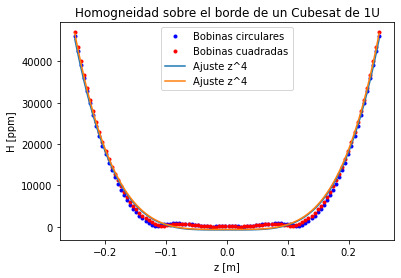

In [ ]:
def cuarta(x, a ,b):
  return a * x ** (4) + b 

popt1, pvar1 =curve_fit(cuarta, z, HCirc) #ajuste cuártico para las bobinas circulares
popt2, pvar2 =curve_fit(cuarta, z, Hsquare) ##ajuste cuártico para las bobinas cuadradas

plt.plot(z, HCirc, 'b.')
plt.plot(z, Hsquare, 'r.')
plt.plot(z, cuarta(z, *popt1))
plt.plot(z, cuarta(z, *popt2))
plt.xlabel('z [m]')
plt.ylabel('H [ppm]')
plt.legend(['Bobinas circulares','Bobinas cuadradas', 'Ajuste z^4', 'Ajuste z^4'])
plt.title('Homogneidad sobre el borde de un Cubesat de 1U')

plt.show()

GRAFICOS H VS L + AJUSTES

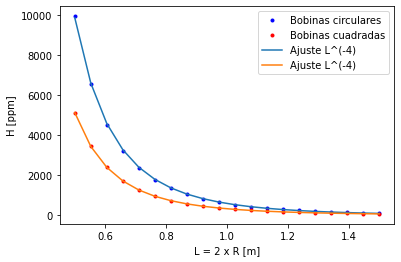

In [ ]:
def cuartaL(x, a ,b):
  return a * x ** (-4) + b

popt1, pvar1 =curve_fit(cuartaL, L, HCircL) #ajuste cuártico para las bobinas circulares
popt2, pvar2 =curve_fit(cuartaL, L, HsquareL) ##ajuste cuártico para las bobinas cuadradas

plt.plot(L, HCircL, 'b.')
plt.plot(L, HsquareL, 'r.')
plt.plot(L, cuartaL(L, *popt1))
plt.plot(L, cuartaL(L, *popt2))
plt.xlabel('L = 2 x R [m]')
plt.ylabel('H [ppm]')
plt.legend(['Bobinas circulares','Bobinas cuadradas', 'Ajuste L^(-4)', 'Ajuste L^(-4)'])

plt.show()

**MOSTREMOS POR QUÉ NO CONSIDERAMOS CAMPOS NO AXIALES EN ESTOS CÓDIGOS: GRÁFICOS B vs Z**

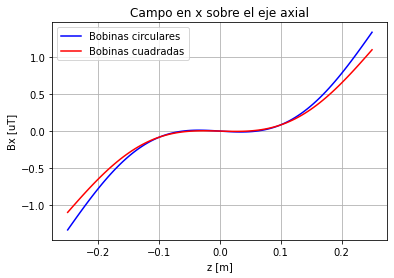

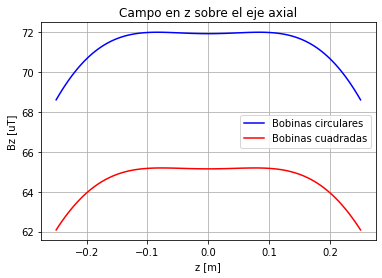

In [ ]:
plt.figure(1)
plt.plot(z, BxCirc, 'blue')
plt.plot(z, Bxsquare, 'red')
plt.xlabel('z [m]')
plt.ylabel('Bx [uT]')
plt.legend(['Bobinas circulares', 'Bobinas cuadradas'])
plt.title('Campo en x sobre el eje axial')
plt.grid()

plt.figure(2)
plt.plot(z, BzCirc, 'blue')
plt.plot(z, Bzsquare, 'red')
plt.xlabel('z [m]')
plt.ylabel('Bz [uT]')
plt.legend(['Bobinas circulares', 'Bobinas cuadradas'])
plt.title('Campo en z sobre el eje axial')
plt.grid()

plt.show()
